In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wbcd.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
print(df.diagnosis.value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [4]:
print("Mean of area_mean:",df.area_mean.mean())
print("Mean of radius_mean:",df.radius_mean.mean())
print("Mean of smooth_mean:",df.smoothness_mean.mean())

Mean of area_mean: 654.8891036906855
Mean of radius_mean: 14.127291739894552
Mean of smooth_mean: 0.09636028119507908


### Scaling should improve the model

## Define X and y Train Test Split 

In [5]:
X = df.drop(columns = ['id','diagnosis'])
y=df.diagnosis

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1, stratify = y)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X.head()

(455, 30)
(114, 30)
(455,)
(114,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [8]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training Accuracy:", model.score(X_train,y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.945054945054945
Test Accuracy: 0.9385964912280702


### find score value with unscaled data

In [11]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy with unscaled data:", scores.mean())

Accuracy with unscaled data: 0.9318681318681319


### MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# model = KNeighborsClassifier()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(scores)
print("Validation accuracy witg MinMaxScaler:", scores.mean())

[0.96703297 0.95604396 0.96703297 0.98901099 0.94505495]
Validation accuracy witg MinMaxScaler: 0.9648351648351647


### StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Validation accuracy with StandarScaler:", scores.mean())


Validation accuracy with StandarScaler: 0.9648351648351647


## Find the test accuracy for chosen sclaer(min_max scaler)

In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
print("TRaining Accuracy:", model.score(X_train_scaled, y_train))
print("Test Accuracy:",model.score(X_test_scaled, y_test))

TRaining Accuracy: 0.9714285714285714
Test Accuracy: 0.9736842105263158


## Q2. Continue with the same data

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


### find training and validation accuracy for range(1,15)

In [17]:
training_accuracy = []
validation_accuracy = []

for k in range(1,15):
    model=KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train,y_train))
    scores = cross_val_score(model,X_train,y_train, cv=5)
    print("K:",k,"Validation accuracy",scores.mean())
    validation_accuracy.append(scores.mean())
    
    


K: 1 Validation accuracy 0.923076923076923
K: 2 Validation accuracy 0.9120879120879121
K: 3 Validation accuracy 0.9252747252747253
K: 4 Validation accuracy 0.9208791208791208
K: 5 Validation accuracy 0.9318681318681319
K: 6 Validation accuracy 0.9186813186813186
K: 7 Validation accuracy 0.9296703296703296
K: 8 Validation accuracy 0.923076923076923
K: 9 Validation accuracy 0.9274725274725274
K: 10 Validation accuracy 0.923076923076923
K: 11 Validation accuracy 0.9252747252747252
K: 12 Validation accuracy 0.9186813186813186
K: 13 Validation accuracy 0.9252747252747252
K: 14 Validation accuracy 0.9164835164835164


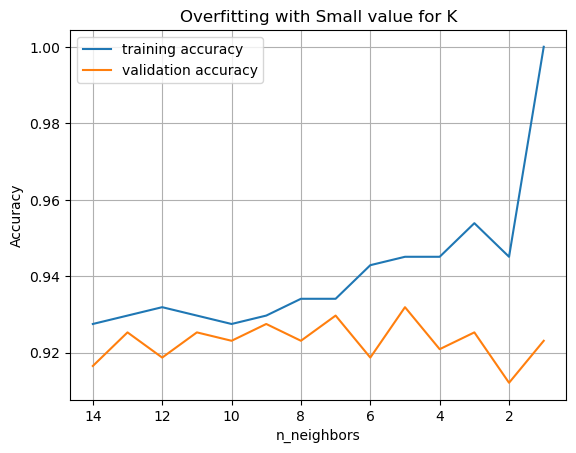

In [24]:
plt.plot(range(1,15), training_accuracy, label="training accuracy")
plt.plot(range(1,15), validation_accuracy, label="validation accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting with Small value for K")
ax = plt.gca()
ax.invert_xaxis()
plt.grid()
plt.savefig("overfitting.png")
plt.show()